# Determination of Spanish Wikipedia Editors Gender using Support Vector Machines, Decision Tree, Random Forest, Ensemble Learning, Extremely Randomized Trees and Adaptive Boosting Algorithms 

Wikipedia is a free online encyclopaedia that is written and edited by volunteers from around the world. It is one of the most popular websites in the world, with over 500 million unique visitors per month. Even though it can be edited by anybody, not everybody edits it. Wikipedia has often been criticized for its lack of diversity. There is a significant gender gap in the number of editors, with only 13.7% of editors being women (Meneses and Poblete 2019). This imbalance in contributions and therefore content is yet another case of the masculine culture of technoscience (Heather Ford and Judy Wajcman, 2017). This gender bias can lead to content gaps and a skewed representation of topics, affecting the inclusivity and accuracy of Wikipedia's content. This can lead to further negative consequences: first, it means that Wikipedia is not as representative of the world as it could be; second, it can make it difficult for women to find information about themselves and their interests on Wikipedia and third, it can discourage women from participating in Wikipedia. There are a number of reasons why there is a gender gap in Wikipedia editors. One reason could be that women are less likely than men to have the technical skills needed to edit Wikipedia. Another reason could be that women are less likely than men to feel welcome on Wikipedia. Yet another reason could be women don’t disclose their gender as much as their counterparts. 
In this project, I have used dataset from the UCI Machine Learning repository. It contains 4746 instances each containing 21 attributes with no missing values. Each instance is one person’s unique edit to the Wikipedia page. 
I have separated the dataset into two separate datasets one for gender selected as unknown and anpther for male and female gender.
After identifying the best fit predictive model, I used the model in the dataset with gender value selected as unknown and predicted the gender of those editors whose gender was given as unknown in this dataset.
The prediction aligns with my assumption that women don’t disclose their gender as much as their counterparts. Because, 1,555 of 1,601 unknown gender have been predicted as female gender after the prediction. 

# Import necessary library

In [139]:
#Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Data Exploration

In [140]:

# Load the data

gender_data = pd.read_csv('Gender Gap in Spanish WP.csv')

#print(gender_data)
print(gender_data.columns) 
gender_data.describe()


Index(['gender', 'C_api', 'C_man', 'E_NEds', 'E_Bpag', 'firstDay', 'lastDay',
       'NEds', 'NDays', 'NActDays', 'NPages', 'NPcreated', 'pagesWomen',
       'wikiprojWomen', 'ns_user', 'ns_wikipedia', 'ns_talk', 'ns_userTalk',
       'ns_content', 'weightIJ', 'NIJ'],
      dtype='object')


,gender,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
count,4746.000000,4746.000000,4746.000000,4746.000000,4.746000e+03,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,0.737042,2.082807,1.484197,1.646228,2.009942e+13,2.015489e+13,2029.969448,2036.607880,183.162663,689.451960,43.479140,0.438896,0.439949,74.372946,74.368310,49.947745,96.081753,1521.886641,1.000000,867.148546
std,0.585355,0.964978,1.099795,1.079263,3.516337e+10,1.748104e+10,7793.300833,1336.119914,374.034481,3355.302483,297.395507,5.327440,17.832244,246.407233,560.782479,215.554281,545.025818,6099.009235,0.325763,325.933076
min,0.000000,1.000000,0.000000,0.000000,2.002011e+13,2.012010e+13,50.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.411985,297.000000
25%,0.000000,1.000000,1.000000,1.000000,2.007042e+13,2.014070e+13,95.000000,835.250000,24.000000,29.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,61.000000,0.831954,664.000000
50%,1.000000,3.000000,1.000000,2.000000,2.009121e+13,2.016072e+13,218.000000,2035.500000,53.000000,68.000000,4.000000,0.000000,0.000000,14.000000,1.000000,4.000000,5.000000,151.000000,0.997535,917.000000
75%,1.000000,3.000000,2.000000,3.000000,2.013040e+13,2.017073e+13,757.750000,3146.500000,154.000000,219.750000,14.000000,0.000000,0.000000,46.000000,8.000000,19.000000,22.000000,563.750000,1.057149,994.000000
max,2.000000,3.000000,3.000000,3.000000,2.017093e+13,2.017100e+13,153193.000000,5349.000000,3843.000000,94142.000000,13394.000000,185.000000,949.000000,6041.000000,24392.000000,4788.000000,12350.000000,115547.000000,1.865008,1596.000000


In [141]:
print(gender_data)

#0 = unknown gender, 1= male, 2 = female

      gender    C_api  C_man  E_NEds  E_Bpag        firstDay         lastDay  \
0          1     male      1       2       2  20170527205915  20170721044501   
1          0  unknown      3       3       1  20110301072441  20170731213735   
2          1     male      1       0       2  20060907204302  20140911191722   
3          1     male      1       1       2  20121003144916  20121208180528   
4          0  unknown      3       1       1  20070311125035  20141106121057   
...      ...      ...    ...     ...     ...             ...             ...   
4741       1     male      3       2       2  20120227100614  20170930073013   
4742       0  unknown      3       3       1  20111108054659  20170906055641   
4743       2  unknown      2       1       2  20120405102902  20170302073010   
4744       2   female      3       3       2  20091014131349  20161112122730   
4745       1  unknown      1       2       0  20050901045004  20151022222845   

      NEds  NDays  NActDays  ...  NPcre

# Data Pre-processing

In [142]:
# Use value_counts to count the occurrences of each unique value in the column
#0 (unknown), 1 (male), 2 (female) specified by the author of the dataset
value_counts = gender_data['gender'].value_counts()
print("Value counts for each type in the column:")
print(value_counts)

Value counts for each type in the column:
gender
1    2792
0    1601
2     353
Name: count, dtype: int64


We can see 2904 rows has gender as unknown while only 181 columns have female gender. First, column with unknown values will be taken off from main dataset and create a separate dataset for later use. As columns with male and female values are not balanced we have to balance it to get better prediction result.

In [143]:
# Separate dataset for gender = 0 for categorical value 
#df_gender_0 = gender_data[gender_data['gender'].isin(['unknown'])]

# Separate dataset for gender = 1 or 2 for categorical value 
#gender_data = gender_data[gender_data['gender'].isin(['male', 'female'])]

# Separate dataset for gender = 0
df_gender_0 = gender_data[gender_data['gender'] == 0]

# Separate dataset for gender = 1 or 2
gender_data = gender_data[gender_data['gender'].isin([1, 2])]

print("Dataset with gender = unknown:")
print(df_gender_0)
print("\nDataset with gender = male, female:")
print(gender_data)

Dataset with gender = unknown:
      gender    C_api  C_man  E_NEds  E_Bpag        firstDay         lastDay  \
1          0  unknown      3       3       1  20110301072441  20170731213735   
4          0  unknown      3       1       1  20070311125035  20141106121057   
6          0  unknown      3       0       1  20130722234149  20130731130629   
10         0  unknown      3       1       3  20110510155359  20160921112401   
14         0  unknown      3       0       2  20101013091609  20150727121854   
...      ...      ...    ...     ...     ...             ...             ...   
4731       0  unknown      3       3       2  20060309094510  20170720140109   
4732       0  unknown      3       0       2  20070206114958  20170614083345   
4737       0  unknown      3       0       1  20070816200615  20130731185925   
4739       0  unknown      3       0       3  20111012103037  20170512141844   
4742       0  unknown      3       3       1  20111108054659  20170906055641   

      NE

'pagesWomen' and 'wikiprojWomen' features were empty, so these were dropped from the dataset. C_man feature includes the gender of the editors that was chosen by the editors and C_api feature showcase the api generated gender of the editors. Including these in the dataset will make the predictive model too accurate but when working with unknown gender dataset, the model will not give accuate result.

In [144]:
# Drop irrelevant columns
columns_to_drop = ['C_api', 'C_man', 'pagesWomen', 'wikiprojWomen'] # 'NPcreated', 'lastDay']   
gender_data = gender_data.drop(columns_to_drop, axis=1)

#clean null / 0 value: the dataset does not have any missing value. 
#gender_data = gender_data[~(gender_data == 0).any(axis=1)]



# Label Encoding for Categorical Values

In [145]:
#if instead of encoded 
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()

# Iterate through the columns and apply label encoding to categorical columns
for column in gender_data.columns:
    if gender_data[column].dtype == 'object':
        gender_data[column] = label_encoder.fit_transform(gender_data[column])

# Print the DataFrame columns
print("Columns in the DataFrame:")
print(gender_data.columns)

# Print the number of rows
num_of_rows = len(gender_data.index)
print("\nNumber of rows:", num_of_rows)
gender_data.dtypes

Columns in the DataFrame:
Index(['gender', 'E_NEds', 'E_Bpag', 'firstDay', 'lastDay', 'NEds', 'NDays',
       'NActDays', 'NPages', 'NPcreated', 'ns_user', 'ns_wikipedia', 'ns_talk',
       'ns_userTalk', 'ns_content', 'weightIJ', 'NIJ'],
      dtype='object')

Number of rows: 3145


gender            int64
E_NEds            int64
E_Bpag            int64
firstDay          int64
lastDay           int64
NEds              int64
NDays             int64
NActDays          int64
NPages            int64
NPcreated         int64
ns_user           int64
ns_wikipedia      int64
ns_talk           int64
ns_userTalk       int64
ns_content        int64
weightIJ        float64
NIJ               int64
dtype: object

# Train-Test Split and Feature Standardization

   gender  E_NEds  E_Bpag        firstDay         lastDay  NEds  NDays  \
0       1       2       2  20170527205915  20170721044501   543     56   
2       1       0       2  20060907204302  20140911191722    57   2927   
3       1       1       2  20121003144916  20121208180528   104     67   

   NActDays  NPages  NPcreated  ns_user  ns_wikipedia  ns_talk  ns_userTalk  \
0        43     204          4       91            28        6           76   
2        25      25          0        3             0        1            3   
3         5      66          2       20             1        2            2   

   ns_content  weightIJ  NIJ  
0         324  0.915024  978  
2          49  0.800528  664  
3          78  1.027717  841  
Index(['gender', 'E_NEds', 'E_Bpag', 'firstDay', 'lastDay', 'NEds', 'NDays',
       'NActDays', 'NPages', 'NPcreated', 'ns_user', 'ns_wikipedia', 'ns_talk',
       'ns_userTalk', 'ns_content', 'weightIJ', 'NIJ'],
      dtype='object')


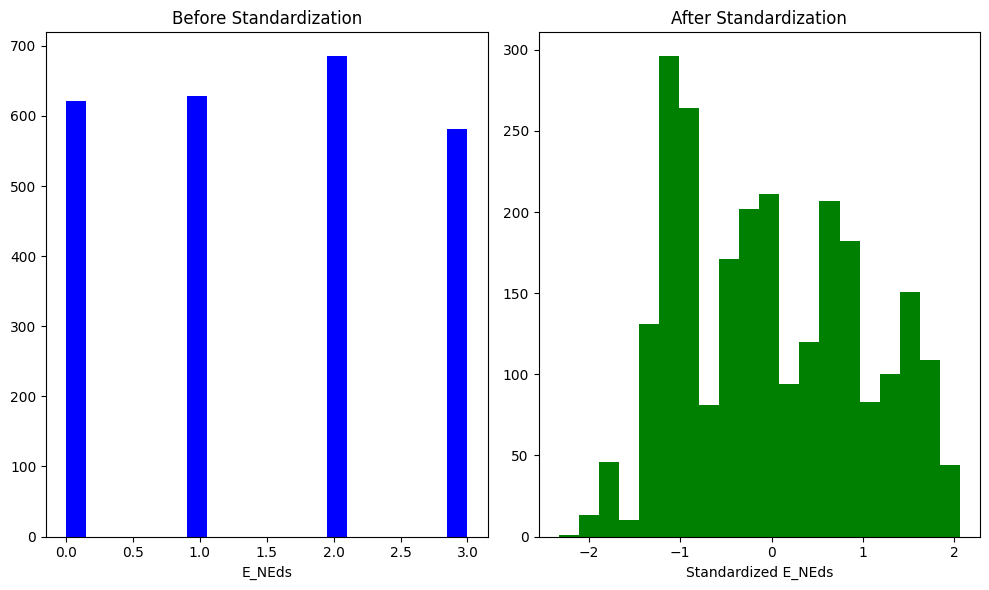

In [146]:
print(gender_data.head(3))
print(gender_data.columns)

# Separate features and target variable
X = gender_data.drop(['gender'], axis=1)
y = gender_data['gender']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot the distribution of a feature before standardization
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(X_train['E_NEds'], bins=20, color='blue')
plt.title('Before Standardization')
plt.xlabel('E_NEds')

# Plot the distribution of the standardized feature
plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:, 2], bins=20, color='green')
plt.title('After Standardization')
plt.xlabel('Standardized E_NEds')

plt.tight_layout()
plt.show()


# Multivariate Analysis with Heatmap

In [147]:
#Multivariate Analysis:

# Create the heatmap

corr = gender_data.corr(numeric_only=False)
px.imshow(corr, aspect='auto', text_auto=True)



# Feature Selection/Engineering: PCA to Reduce Dimentionality

Principal Component 1:
- Feature 4: 0.37919604429768916
- Feature 13: 0.36099958105378066
- Feature 6: 0.3555369840755109
- Feature 7: 0.3408701965464692
- Feature 11: 0.32184747936724156
- Feature 12: 0.30406594061685793
- Feature 10: 0.2538732111554518
- Feature 9: 0.24850910714276428
- Feature 8: 0.22149419978196883
- Feature 0: 0.20048164286214984

Principal Component 2:
- Feature 5: 0.640573876813954
- Feature 2: 0.6025585956958026
- Feature 0: 0.2492356685261178
- Feature 15: 0.15631636309236174
- Feature 12: 0.14659119437665072
- Feature 3: 0.14174679584537608
- Feature 10: 0.14092673768101838
- Feature 7: 0.13213223865926635
- Feature 4: 0.12149777694839604
- Feature 13: 0.10638119978552325

Principal Component 3:
- Feature 14: 0.6766742277865343
- Feature 15: 0.5766701334817269
- Feature 1: 0.361994080325439
- Feature 2: 0.17828001000704558
- Feature 5: 0.12718172496249186
- Feature 3: 0.0826607147879818
- Feature 7: 0.08062486546318483
- Feature 12: 0.05836281130891823
- Feat

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



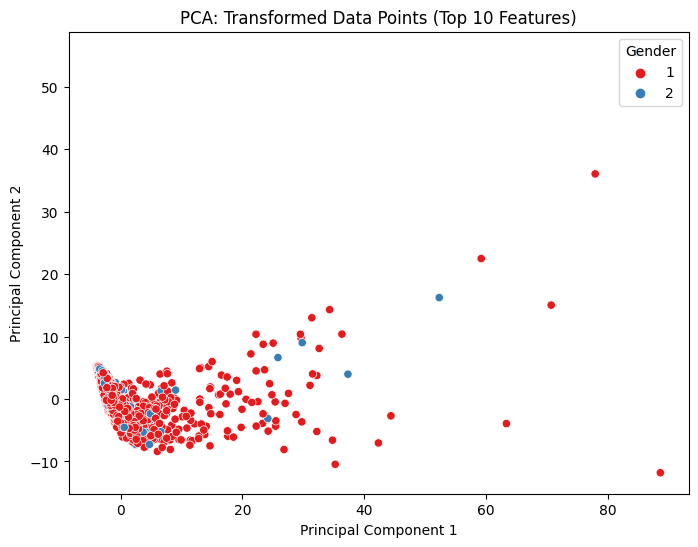

In [148]:


# X_train_scaled, X_test_scaled, y_train, y_test, feature_names are available already

# Perform PCA and Fit PCA on the scaled training data
pca = PCA(n_components=10)  # Keep only the top 10 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Get the feature importances from PCA
feature_importances = np.abs(pca.components_)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances, axis=1)[:, ::-1]

# Perform PCA and Fit PCA on the scaled training data using only the top 10 most important features
top_10_feature_indices = sorted_indices[:, :10]  # Select top 10 features
X_train_top_10 = X_train_scaled[:, top_10_feature_indices.flatten()]
X_test_top_10 = X_test_scaled[:, top_10_feature_indices.flatten()]

# Fit PCA on the scaled training data with only the top 10 features
pca = PCA(n_components=10)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_top_10)
X_test_pca = pca.transform(X_test_top_10)

# Print the indices of the top features for each principal component
for i, indices in enumerate(top_10_feature_indices):
    print(f"Principal Component {i+1}:")
    for index in indices:
        print(f"- Feature {index}: {feature_importances[i, index]}")
    print()  

# Plot the transformed data points after PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='Set1')
plt.title('PCA: Transformed Data Points (Top 10 Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender', loc='upper right')
plt.show()

In [149]:
"""
# Perform PCA and Fit PCA on the scaled training data
n_components=10
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Get the feature importances from PCA
feature_importances = np.abs(pca.components_)

# Sort the feature importances in descending order
sorted_indices = np.argsort(feature_importances, axis=1)[:, ::-1]

# Get the names of the original features
feature_names = X.columns

# Print the feature importances for each principal component
for i, indices in enumerate(sorted_indices):
    print(f"Principal Component {i+1}:")
    for index in indices:
        print(f"- {feature_names[index]}: {feature_importances[i, index]}")
    print()

import seaborn as sns

# Plot the transformed data points after PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='Set1')
plt.title('PCA: Transformed Data Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender', loc='upper right')
plt.show()

"""


'\n# Perform PCA and Fit PCA on the scaled training data\nn_components=10\npca = PCA(n_components)\nX_train_pca = pca.fit_transform(X_train_scaled)\nX_test_pca = pca.transform(X_test_scaled)\n\n# Get the feature importances from PCA\nfeature_importances = np.abs(pca.components_)\n\n# Sort the feature importances in descending order\nsorted_indices = np.argsort(feature_importances, axis=1)[:, ::-1]\n\n# Get the names of the original features\nfeature_names = X.columns\n\n# Print the feature importances for each principal component\nfor i, indices in enumerate(sorted_indices):\n    print(f"Principal Component {i+1}:")\n    for index in indices:\n        print(f"- {feature_names[index]}: {feature_importances[i, index]}")\n    print()\n\nimport seaborn as sns\n\n# Plot the transformed data points after PCA\nplt.figure(figsize=(8, 6))\nsns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette=\'Set1\')\nplt.title(\'PCA: Transformed Data Points\')\nplt.xlabel(\'Principal

# Plots for Principal Component Analysis 

In [150]:
"""
# Get the names of the features
feature_names = X.columns

# Get the first 10 principal components
principal_components = pca.components_[:10]

# Create a bar plot for each principal component
for i, component in enumerate(principal_components):
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, component)
    plt.xlabel('Features')
    plt.ylabel('Weight')
    plt.title(f'Principal Component {i+1}')
    plt.xticks(rotation=90)
    plt.show()

"""


"\n# Get the names of the features\nfeature_names = X.columns\n\n# Get the first 10 principal components\nprincipal_components = pca.components_[:10]\n\n# Create a bar plot for each principal component\nfor i, component in enumerate(principal_components):\n    plt.figure(figsize=(10, 6))\n    plt.bar(feature_names, component)\n    plt.xlabel('Features')\n    plt.ylabel('Weight')\n    plt.title(f'Principal Component {i+1}')\n    plt.xticks(rotation=90)\n    plt.show()\n\n"

# Explained Variance Ratio and Cumulative Explained Variance from PCA

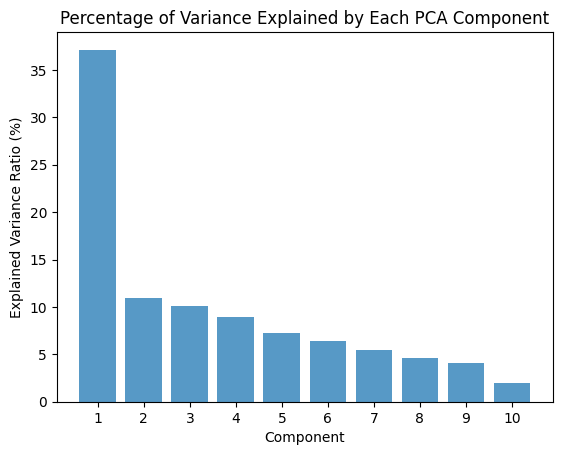

In [151]:
n_components = 10
# Calculate the percentage of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative sum of explained variances
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the percentage of variance explained by each component
plt.bar(range(1, n_components+1), explained_variance_ratio * 100, alpha=0.75)
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Percentage of Variance Explained by Each PCA Component')
plt.xticks(range(1, n_components+1))
plt.show()

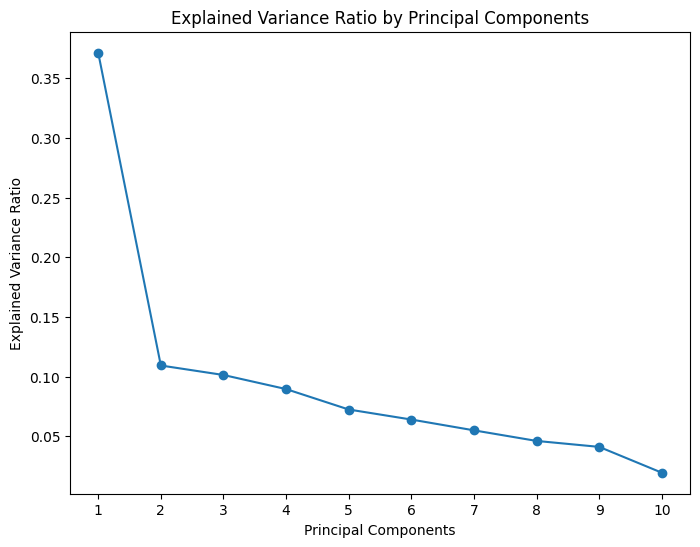

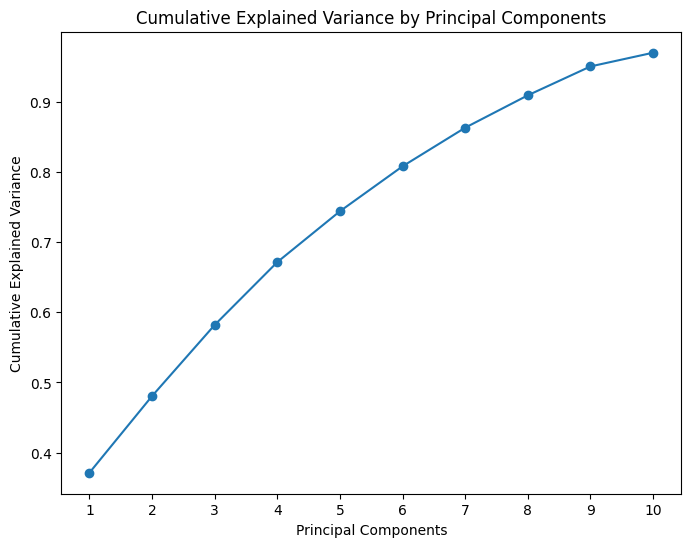

In [152]:
# Get the explained variance ratio from PCA
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1))


# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xticks(range(1, len(cumulative_variance) + 1))


plt.show()





As can be seen from above graphs that PCA 1 and 2 holds most of the important features informations. The n_components has been reduced to 2.

In [153]:
"""
#Reducing n_components to 2 as most of the features are explained by prinical components 1 and 2.
n_components = 2  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
"""

'\n#Reducing n_components to 2 as most of the features are explained by prinical components 1 and 2.\nn_components = 2  \npca = PCA(n_components=n_components)\nX_train_pca = pca.fit_transform(X_train_scaled)\nX_test_pca = pca.transform(X_test_scaled)\n'

# Logistic Regression Model

Logistic Regression Model Accuracy: 0.9014308426073132


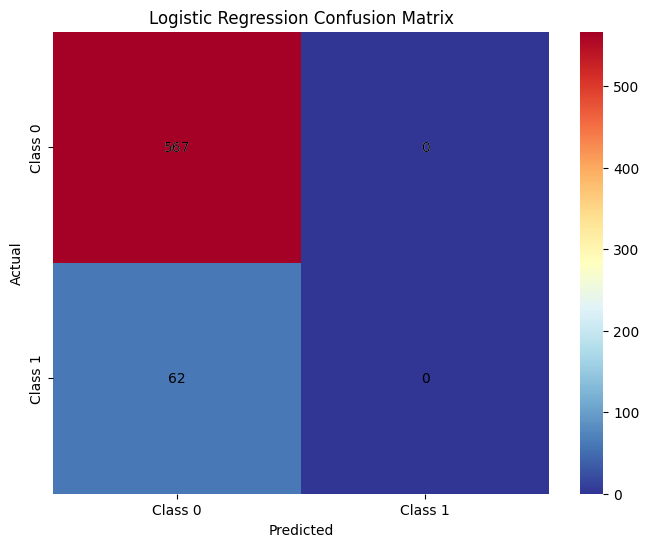

In [154]:

# Create a logistic regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = lr_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Model Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='RdYlBu_r', fmt='d', xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Add text inside each cell at the center
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j+0.5, i+0.5, cm[i, j], horizontalalignment='center', verticalalignment='center') 
        # Add offsets to center text
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Decision Tree Classifier model

Decision Tree Classifier Model Accuracy: 0.9014308426073132


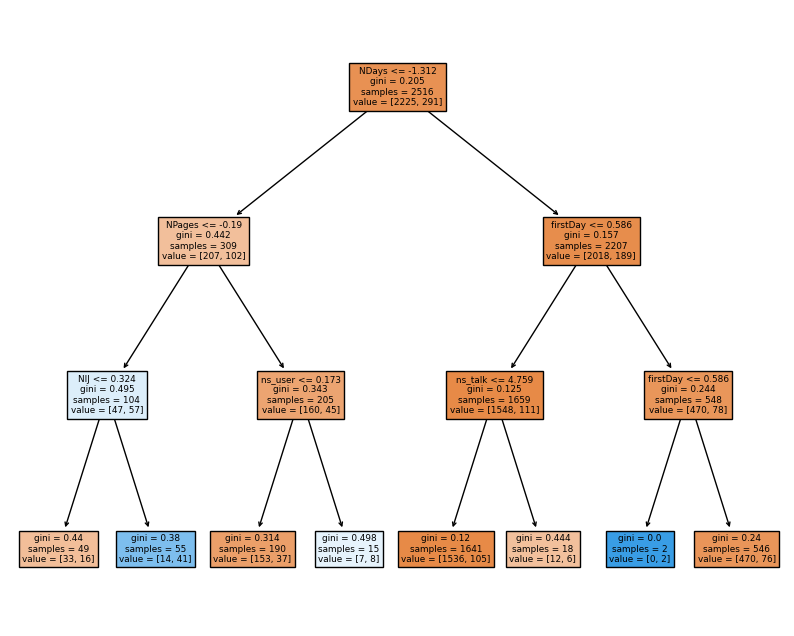

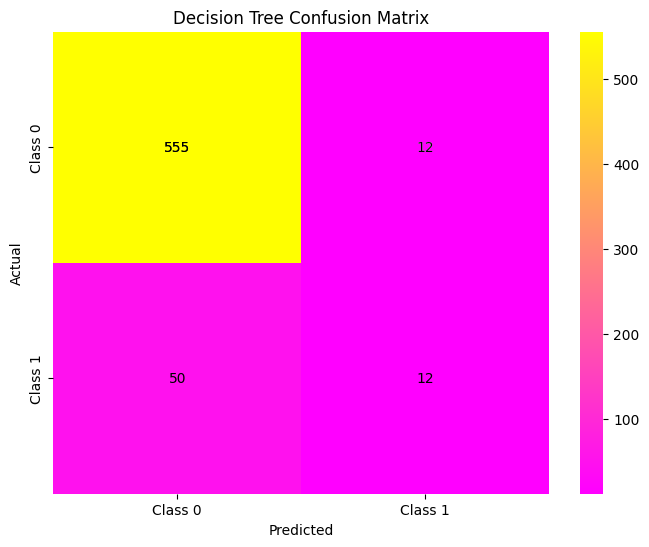

In [155]:


# Create the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = dt_model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Classifier Model Accuracy:", accuracy)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns)
plt.show()


# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='spring', fmt='d', xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Add text inside each cell at the center
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j+0.5, i+0.5, cm[i, j], horizontalalignment='center', verticalalignment='center') 
        # Add offsets to center text
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Random Forest Classifier Model

Random Forest Classifier Model Accuracy: 0.9030206677265501


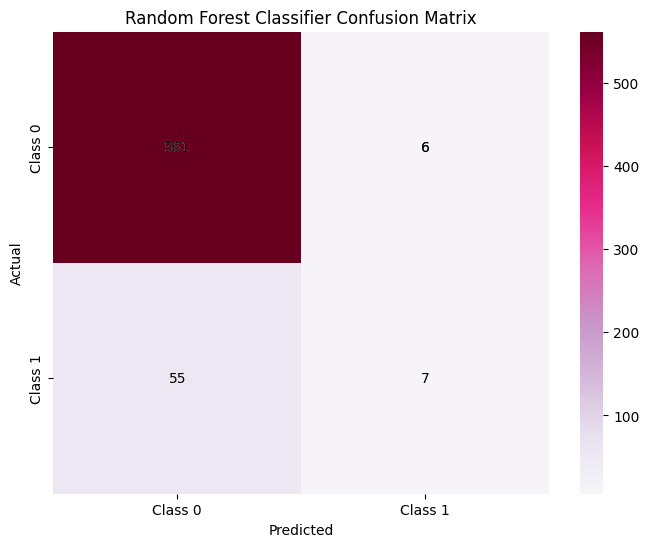

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



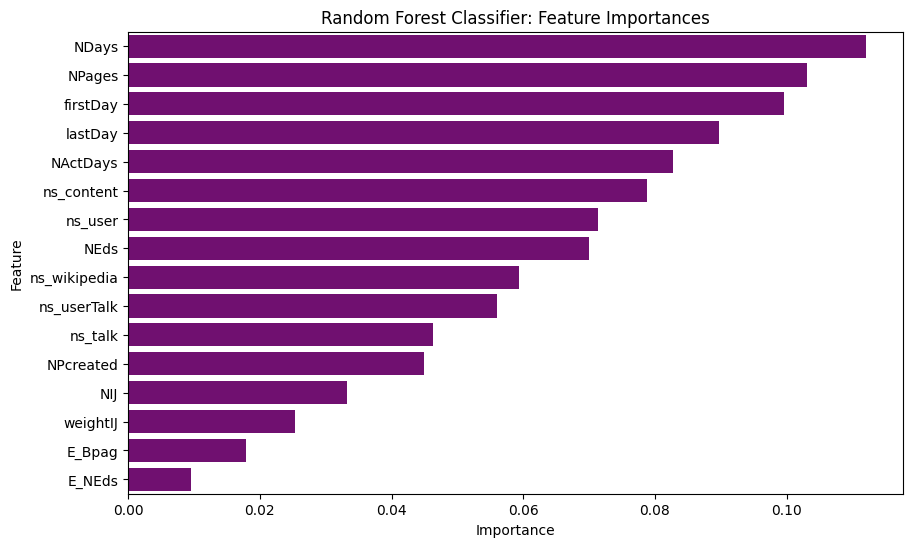

In [156]:


# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = rf.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Random Forest Classifier Model Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='PuRd', fmt='d', xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Add text inside each cell at the center
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j+0.5, i+0.5, cm[i, j], horizontalalignment='center', verticalalignment='center') 
        # Add offsets to center text

plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Get feature importances from the trained model
importances = rf.feature_importances_

# Get the indices of the features sorted in descending order of importance
indices = np.argsort(importances)[::-1]

# Get the feature names
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], color='purple')
plt.title('Random Forest Classifier: Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Support Vector Machine Model

SVC Model Accuracy: 0.8807631160572337


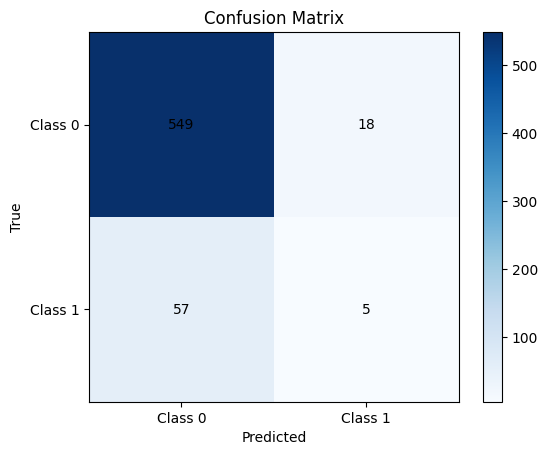

In [157]:
from sklearn.metrics import confusion_matrix

# Create a SVC model
svmodel = SVC(kernel='rbf', C=100)

# Train the model
svmodel.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = svmodel.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("SVC Model Accuracy:", accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap='Blues')

# Add text inside each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment='center', verticalalignment='center')

plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Ensemble Learning Model combining svc_model and rf_model

Accuracy with Ensemble Learning: 0.8966613672496025


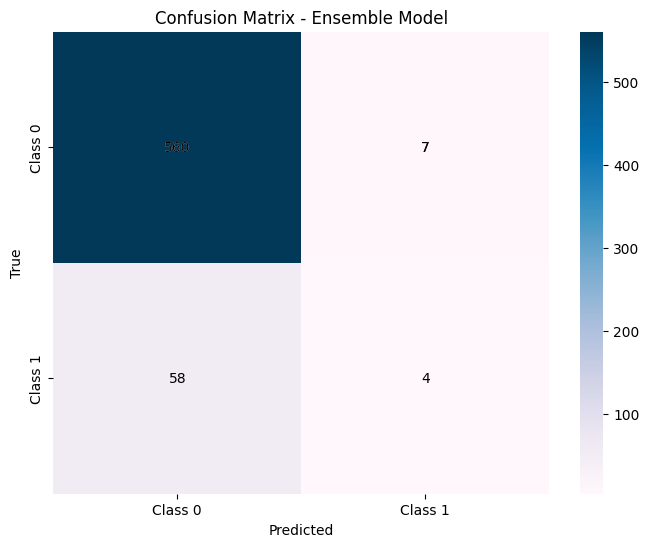

In [158]:
#Ensemble Learning: Combining two models to get better model accuracy, Reduced variance 
#and Improved interpretability

# Create individual models
svc_model = SVC(kernel='rbf', C=100)
rf_model = RandomForestClassifier(n_estimators=70)

# Create the ensemble model using VotingClassifier
ensemble = VotingClassifier(estimators=[('svc', svc_model), ('rf', rf_model)])

# Preprocess the data (e.g., feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the ensemble model
ensemble.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = ensemble.predict(X_test_scaled)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with Ensemble Learning:", accuracy)

#num_features = X_train_scaled.shape[1]
#print("Number of features:", num_features)


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='PuBu', fmt='d', xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Add text inside each cell at the center
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j+0.5, i+0.5, cm[i, j], horizontalalignment='center', verticalalignment='center') 
        
plt.title('Confusion Matrix - Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

We create individual models, svc_model and rf_model, with their respective configurations. Then, we create the ensemble model using VotingClassifier and pass a list of tuples specifying the name and the model for each base estimator. We preprocess the data by scaling the features using StandardScaler. Finally, we fit the ensemble model on the training data, make predictions on the scaled test data, and calculate the accuracy of the ensemble model.

# Extremely Randomized Trees classifier Model

Accuracy with Extremely Randomized Trees classifier: 0.9014308426073132


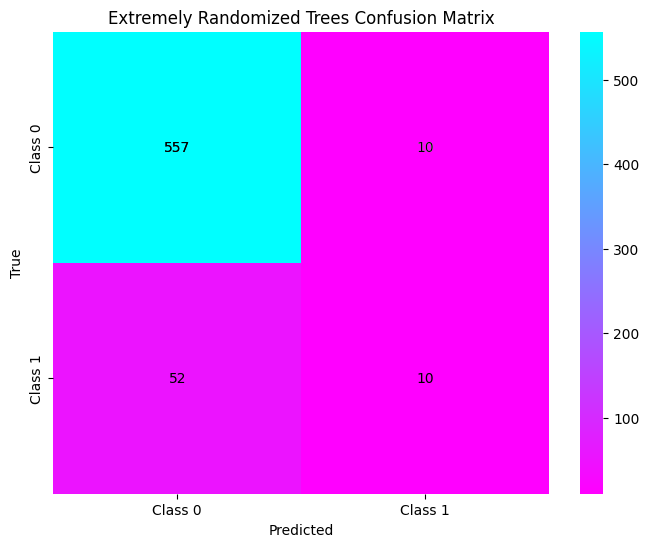

In [159]:


# Create an Extremely Randomized Trees classifier
er_model = ExtraTreesClassifier()

# Train the model
er_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = er_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Extremely Randomized Trees classifier:", accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='cool_r', fmt='d', xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Add text inside each cell at the center
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j+0.5, i+0.5, cm[i, j], horizontalalignment='center', verticalalignment='center') 


plt.title('Extremely Randomized Trees Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Adaptive Boost (AdaBoost) Classifier Model

/Users/fahminaahmed/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy with AdaBoost: 0.9014308426073132


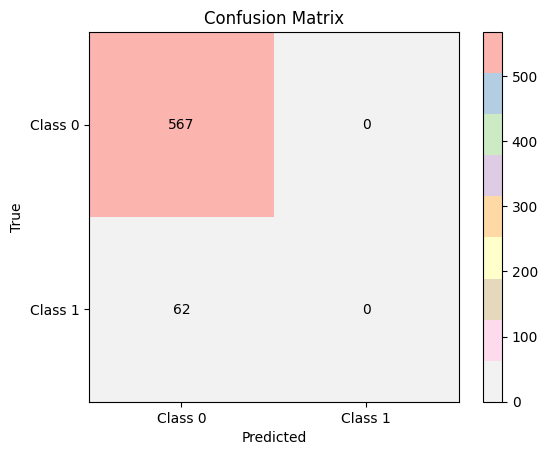

In [160]:

# Create individual models
svc_model = SVC(kernel='rbf', C=100, probability=True)
rf_model = RandomForestClassifier(n_estimators=70, max_depth=10)

# Create the ensemble model using AdaBoostClassifier
ada_boost = AdaBoostClassifier(base_estimator=svc_model, n_estimators=100, learning_rate=0.01)

# Preprocess the data (e.g., feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the ensemble model
ada_boost.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = ada_boost.predict(X_test_scaled)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with AdaBoost:", accuracy)



# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap='Pastel1_r')

# Add text annotations to each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment='center', verticalalignment='center')

plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

as adaboost model gave highest accuacy predictive score, we are going to use this prediction model to identify the gender of the unknown dataset called df_gender_0.

In [161]:
# Make predictions on the dataset with unknown gender
columns_to_drop = ['C_api', 'C_man', 'pagesWomen', 'wikiprojWomen']
df_gender_0 = df_gender_0.drop(columns_to_drop, axis=1)

# Assuming 'df_gender_0' is the DataFrame
label_encoder = LabelEncoder()

# Iterate through the columns and apply label encoding to categorical columns
for column in df_gender_0.columns:
    if df_gender_0[column].dtype == 'object':
        df_gender_0[column] = label_encoder.fit_transform(df_gender_0[column])
        
unknown_gender_features = df_gender_0.drop('gender', axis=1)  # Assuming 'gender' is the target column

#processing data (feature scalling)
# Preprocess the data (e.g., feature scaling)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
unknown_gender_features = scaler.transform(unknown_gender_features)

unknown_gender_predictions = rf.predict(unknown_gender_features)
# Add the predicted gender back to the unknown dataset
df_gender_0['predicted_gender'] = unknown_gender_predictions



In [162]:
#identifying how many of the unknown gender were male and how many were female
value_counts = df_gender_0['predicted_gender'].value_counts()
print("Value counts for each type in the column:")
print(value_counts)

Value counts for each type in the column:
predicted_gender
1    1555
2      46
Name: count, dtype: int64


In [163]:
# Specify the file path for saving
file_path = '/Users/fahminaahmed/Documents/CU Data Science MSc. /7072 CEM Machine Learning/course work/data.csv'

# Save DataFrame to a CSV file
df_gender_0.to_csv(file_path, index=False)

print("DataFrame saved to CSV file successfully.")

DataFrame saved to CSV file successfully.
